# <a id='toc1_'></a>[**EDA Template**](#toc0_)

Name  
Topic  
email  
June 4th, 2023  


**Table of contents**<a id='toc0_'></a>    
- [**EDA Template**](#toc1_)    
  - [Setup](#toc1_1_)    
  - [**Exploratory Data Analysis**](#toc1_2_)    
    - [Univariate Analysis](#toc1_2_1_)    
    - [Bivariate Analysis](#toc1_2_2_)    
    - [Clustering Analysis](#toc1_2_3_)    
  - [Insights and Conclusions](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Setup](#toc0_)

These are the necessary libraries to import

In [1]:
# Import all libraries
from capstone_functions import *

master_df = pd.read_parquet("../Data/master_df.parquet")

# Set the random.seed(42)
np.random.seed(42)


Versions used in this notebook:
Python version: 3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]
Pandas version: 2.0.2
Numpy version: 1.23.4
Seaborn version: 0.12.2
Matplotlib version: 3.6.2
Scipy version: 1.10.1
Statsmodels version: 0.13.5
SKLearn version: 1.2.2


## <a id='toc1_2_'></a>[**Exploratory Data Analysis**](#toc0_)


### <a id='toc1_2_1_'></a>[Basic EDA: Univariate Analysis](#toc0_)

Non-Numerical Features:


In [2]:
# Import the function to load the Iris dataset from sklearn.datasets
dfSummary(master_df, is_collapsible=True)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,cancel_events[Float64],Mean (sd) : 1.3 (0.9)min < med < max:0.0 < 2.0 < 2.0IQR (CV) : 2.0 (1.4),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABgUlEQVR4nO3dQWrCQBiG4ZkiopsEETyMh+hhewhvI2VctKWg6baLxmIa6Vf6PNthJMpLYGD4rcMwFEjx8NsPAJ8tfvsB+JtqretSynLi9vdhGF6/WhAkN6u1rrfb7WPXdZsp+0+n03Ot9emrKAXJFMuu6zb7/f617/u3Wza21laHw2FzPB6XpRRBMp++7992u93LhK3rsQWHGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIlydVDAvea3wJjRIO85vwXGXHtD3m1+C4z5drbPPea3wBiHGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIInij5Nm4u7oPAQ5A3dH5yPIebg7OhNBzsjd0Z9zqCGKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiTKt7d9WmurWz+0tbY6n8+LUkpXa530YH9Md7lcFv/ot/rR9722/gEB/nb2TjvfLQAAAABJRU5ErkJggg=="">",0(0.0%)
2,gatherings_restrictions[Float64],Mean (sd) : 2.5 (1.8)min < med < max:0.0 < 4.0 < 4.0IQR (CV) : 4.0 (1.4),5 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABnklEQVR4nO3dQWrCQBhA4X+KiG4miOBhPEQP20PkNlLGRZWCptsujJK0IW/C+7ZhzCwegRn4MXVdFxLF29wbkH5bzb0B1SmltI2I9cjl313XXR49MEgNllLa7vf795zzbsz68/n8mVL6eBSlQWqMdc55dzweL03TXIcsLKVs2rbdnU6ndUQYpP5P0zTXw+HwNWLptu+BhxqhGKRQDFIoBikUgxSKQQrFIIVikEIxSKEYpFAMUigGKRSDFIpBCsUghWKQQjFIoRikUAxSKAYplKdDXlPN3kp9eoOccvZW6vPsCznZ7K3U5+Vc9hSzt1IfDzVCMUihGKRQDFIoBikUgxSKQQrFIIVikEIxSKEYpFAMUigGKRSDFIpBCsUghWKQQjFIoRikUAxSKP75ZuWWNjtvkBVb4uy8QdZtcbPzBrkAS5qd91AjFIMUikEKxSCFYpBCQZ6ya7zsrXHPRLgga7zsrXHPVLggo87L3hr3jEQMMiLqvOytcc80L4MspWyG/mgpZXO73VYRkVNKQ5fn+/2+muG9fzHXnqt877PnPxKIx/g7iLtUAAAAAElFTkSuQmCC"">",0(0.0%)
3,infected[Int64],Mean (sd) : 1529243.3 (1862254.2)min < med < max:15.0 < 1007507.5 < 13384650.0IQR (CV) : 1211292.2 (0.8),"1,136 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACDElEQVR4nO3cQYvaQBiH8feNq8TVZlBBb15678Gj9177YXvt3W/RuwiyRpyuKGl6KvRSt5mQ7h/y/K4yEw0PhgnDeF3XBqjI3vsLAH96evShu4/NbJQ4962u69fEseipvwbp7uPFYvGlKIpZysTn8/nF3b8SJZp49A85Kopitt1uX0MI1yaTlmWZ73a72fF4HJkZQeKfPXxkm5mFEK7L5fJHwtzjhDHoORY1kEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkPLmCbqpqqoamlnh7inDOTC/pzoJMsY4vN/vn9br9WAwGDQ6n9yMA/P7rJMgb7fbU57nz5vN5rparV6ajOXA/H7r7JFtZjaZTDgwH42wqIEUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoQUgoSUTnf7pGJzb3/JBcnm3n6TC5LNvf0mF+RvbO7tJxY1kEKQkCL7yE7VcoWemdnPxEu/y+re3cdmNkoc3ub3dnKv3gyyLMu86dUul0tuZhZjzA+Hw/P/Grvf7z+krtCrqhrGGD9Op9PvWZbdm4w1MzudThd3/2Zmjd8MtJDP5/PPIYRp04Ftfm/be/XoTcgvxlvEIqz1HH8AAAAASUVORK5CYII="">",0(0.0%)
4,information_campaigns[Float64],Mean (sd) : 1.9 (0.3)min < med < max:0.0 < 2.0 < 2.0IQR (CV) : 0.0 (6.1),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABhklEQVR4nO3XQUrDQBxG8flLiWYzIUR7jB6gh+hhe4hue5JQkoVRFx23LtpKotAnvt92+IZZPAKJUkqSKB7u/QDpq9W9H6C/KSLqlFK1cP5RSpkuHRikZouIuuu6Xc65XbIfx/EUEftLURqklqhyzu12u52apnmbMxyG4elwOLR931cpJYPU72ma5m29Xr8umNbXDvypEYpBCsUghWKQQjFIoRikUAxSKAYpFIMUikEKxSCFYpBCMUihGKRQDFIoBikUgxSKQQrFIIVikEIxSKEYpFAMUigGKRSDFIpBCsUghWKQQjFIoRikUAxSKAYpFIMUikEKxSCFYpBCMUihGKRQDFIoBikUgxSKQQrFIIVikEIxSKEYpFAMUigGKRSDFIpBCsUghWKQQjFIoRikUAxSKKtbhxFRp5SqhXd/lFKmhVv9U1eDjIi667pdzrldcvE4jqeI2Bul5rj1haxyzu1ms0l1Xb/PuXSapsfj8fjS9/1zRIw/fKN48vl8Xg3D8DR3+N3mE0BwQlVccQFoAAAAAElFTkSuQmCC"">",0(0.0%)
5,internal_movement_restrictions[Float64],Mean (sd) : 1.4 (0.5)min < med < max:0.0 < 1.0 < 2.0IQR (CV) : 1.0 (2.6),3 distinct values,"<img src = ""data:i

In [3]:
master_df_final_set = master_df[master_df.index.date < dt.date(2022, 6, 18)].copy()

master_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1142 entries, 2020-02-15 to 2023-04-01
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cancel_events                         1142 non-null   Float64
 1   gatherings_restrictions               1142 non-null   Float64
 2   infected                              1142 non-null   Int64  
 3   information_campaigns                 1142 non-null   Float64
 4   internal_movement_restrictions        1142 non-null   Float64
 5   international_movement_restrictions   1142 non-null   Float64
 6   school_closing                        1142 non-null   Float64
 7   stay_home_restrictions                1142 non-null   Float64
 8   stringency_index                      1142 non-null   Float64
 9   susceptible                           1142 non-null   Float64
 10  testing_policy                        1142 non-null   Float64
 11 

In [4]:
import plotly.graph_objects as go

# Create a Figure
fig = go.Figure()

# Add trace for 'new_confirmed'
fig.add_trace(go.Scatter(x=master_df.index, y=master_df['new_confirmed'], name='New Confirmed', mode='lines'))

# Add trace for 'new_fatal' with y-axis set as y2
fig.add_trace(go.Scatter(x=master_df.index, y=master_df['new_fatal'], name='New Fatal', mode='lines', yaxis='y2'))

# Update layout for dual y-axes
fig.update_layout(
    title='New Confirmed Cases and Deaths',
    xaxis_title='Date',
    yaxis=dict(title='New Confirmed'),
    yaxis2=dict(title='New Fatal', overlaying='y', side='right') 
)

fig.show()


In [5]:
master_df['new_hospitalized_patients']

date
2020-02-15    0.0
2020-02-16    0.0
2020-02-17    0.0
2020-02-18    0.0
2020-02-19    0.0
             ... 
2023-03-28    NaN
2023-03-29    NaN
2023-03-30    NaN
2023-03-31    NaN
2023-04-01    NaN
Name: new_hospitalized_patients, Length: 1142, dtype: float64

In [6]:
master_df['new_confirmed_ra'] = master_df['new_confirmed'].rolling(window=7).mean()
master_df['new_hospitalized_patients_ra'] = master_df['new_hospitalized_patients'].rolling(window=7).mean()


In [7]:

# Creating a dual Y axis plot
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=master_df.index, y=master_df['new_confirmed'], name='Daily Confirmed'), secondary_y=False)
fig.add_trace(go.Scatter(x=master_df.index, y=master_df['new_hospitalized_patients'], name='Hospitalizations'), secondary_y=True)
fig.add_trace(go.Scatter(x=master_df.index, y=master_df['new_confirmed_ra'], name='Daily Confirmed (7-day RA)'), secondary_y=False)
fig.add_trace(go.Scatter(x=master_df.index, y=master_df['new_hospitalized_patients_ra'], name='Hospitalizations (7-day RA)'), secondary_y=True)

fig.update_layout(title='Daily Confirmed Cases vs Hospitalizations (7-day Rolling Average)', xaxis_title='Date', yaxis_title='Daily Confirmed Cases', yaxis2_title='Hospitalizations')
fig.show()


In [8]:

# Grouping by month and calculating the mean
monthly_mean = master_df.resample('M').mean()

# Calculating the difference from the overall mean
monthly_mean_diff = monthly_mean.groupby(monthly_mean.index.month).transform(lambda x: (x - x.mean())/x.std())

# Creating a bar plot for the difference from the mean
fig = px.bar(monthly_mean_diff['daily_confirmed'], labels={'value': 'Daily Confirmed Cases', 'index': 'Date'})
fig.update_layout(title='Monthly Deviation from Mean Daily Confirmed Cases (%)')
fig.show()

# Performing seasonal decomposition
decomposition = tsa.seasonal_decompose(master_df['daily_confirmed'].dropna(), model='additive')

# Adding the decomposition data to the dataframe
master_df["Trend"] = decomposition.trend
master_df["Seasonal"] = decomposition.seasonal
master_df["Residual"] = decomposition.resid

# Creating subplots for the trend, seasonal, and residual components
cols = ["Trend", "Seasonal", "Residual"]
fig = make_subplots(rows=3, cols=1, subplot_titles=cols)
for i, col in enumerate(cols):
    fig.add_trace(go.Scatter(x=master_df.index, y=master_df[col], name=col), row=i+1, col=1)
fig.update_layout(height=800, width=1200, title='Seasonal Decomposition of Daily Confirmed Cases')
fig.show()


KeyError: 'daily_confirmed'

In [ ]:
fig = px.bar(master_df)

fig.update_layout(
    yaxis_title="", 
    yaxis_tickformat = '%',
    xaxis_title="",
    title="Monthly deviation from mean revenue (%)",
    showlegend=False,
)
fig.show()

In [ ]:
decomposition = tsa.seasonal_decompose(air_traffic_monthly, model='additive')



air_traffic_monthly["Trend"] = decomposition.trend
air_traffic_monthly["Seasonal"] = decomposition.seasonal
air_traffic_monthly["Residual"] = decomposition.resid

air_traffic_monthly.head(10)


cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=air_traffic_monthly.index, y=air_traffic_monthly[col]),
        row=i+1,
        col=1
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

In [ ]:

# Bar plots for categorical variable 'target'
plt.figure(figsize=(10,6))
sns.countplot(x='target', data=df)
plt.show()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


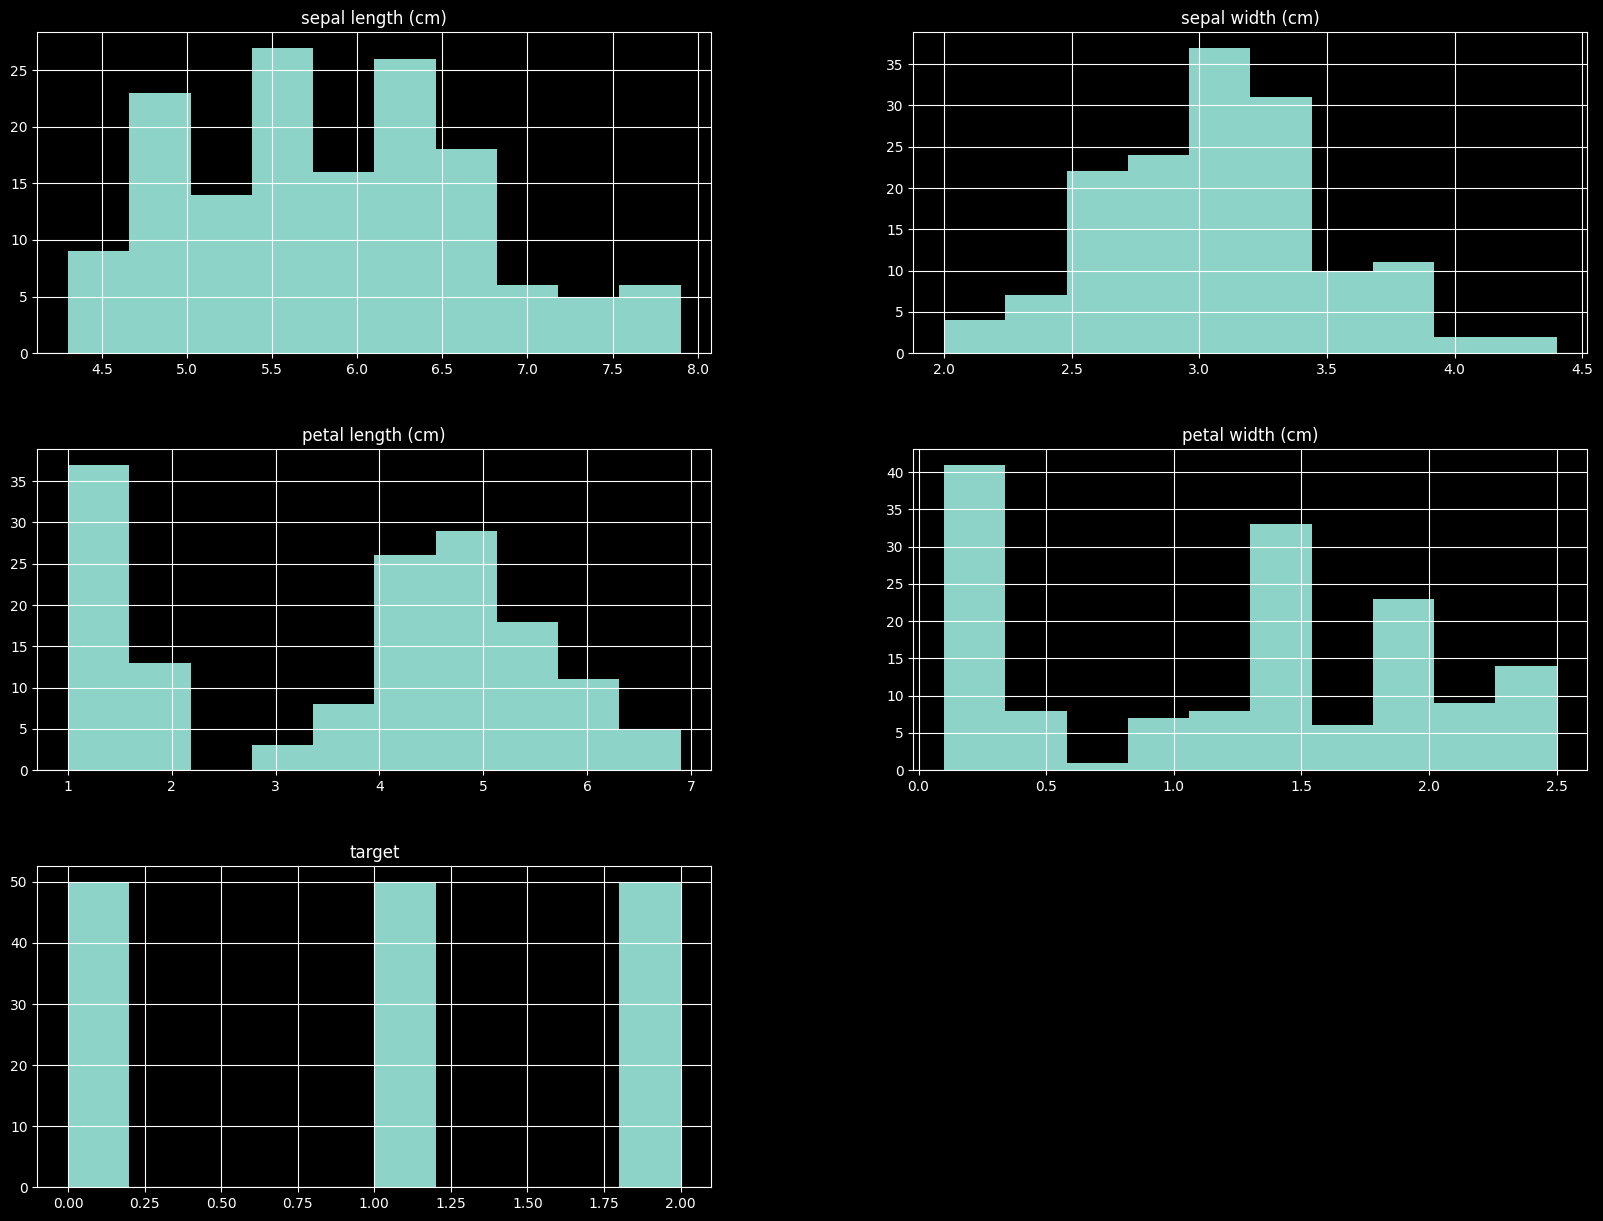

In [ ]:
# Univariate Analysis
display(df.describe().T)

# Histograms for each numeric variables
df.hist(bins=10, figsize=(20,15))
plt.show()



### <a id='toc1_2_2_'></a>[Basic EDA: Bivariate Analysis](#toc0_)

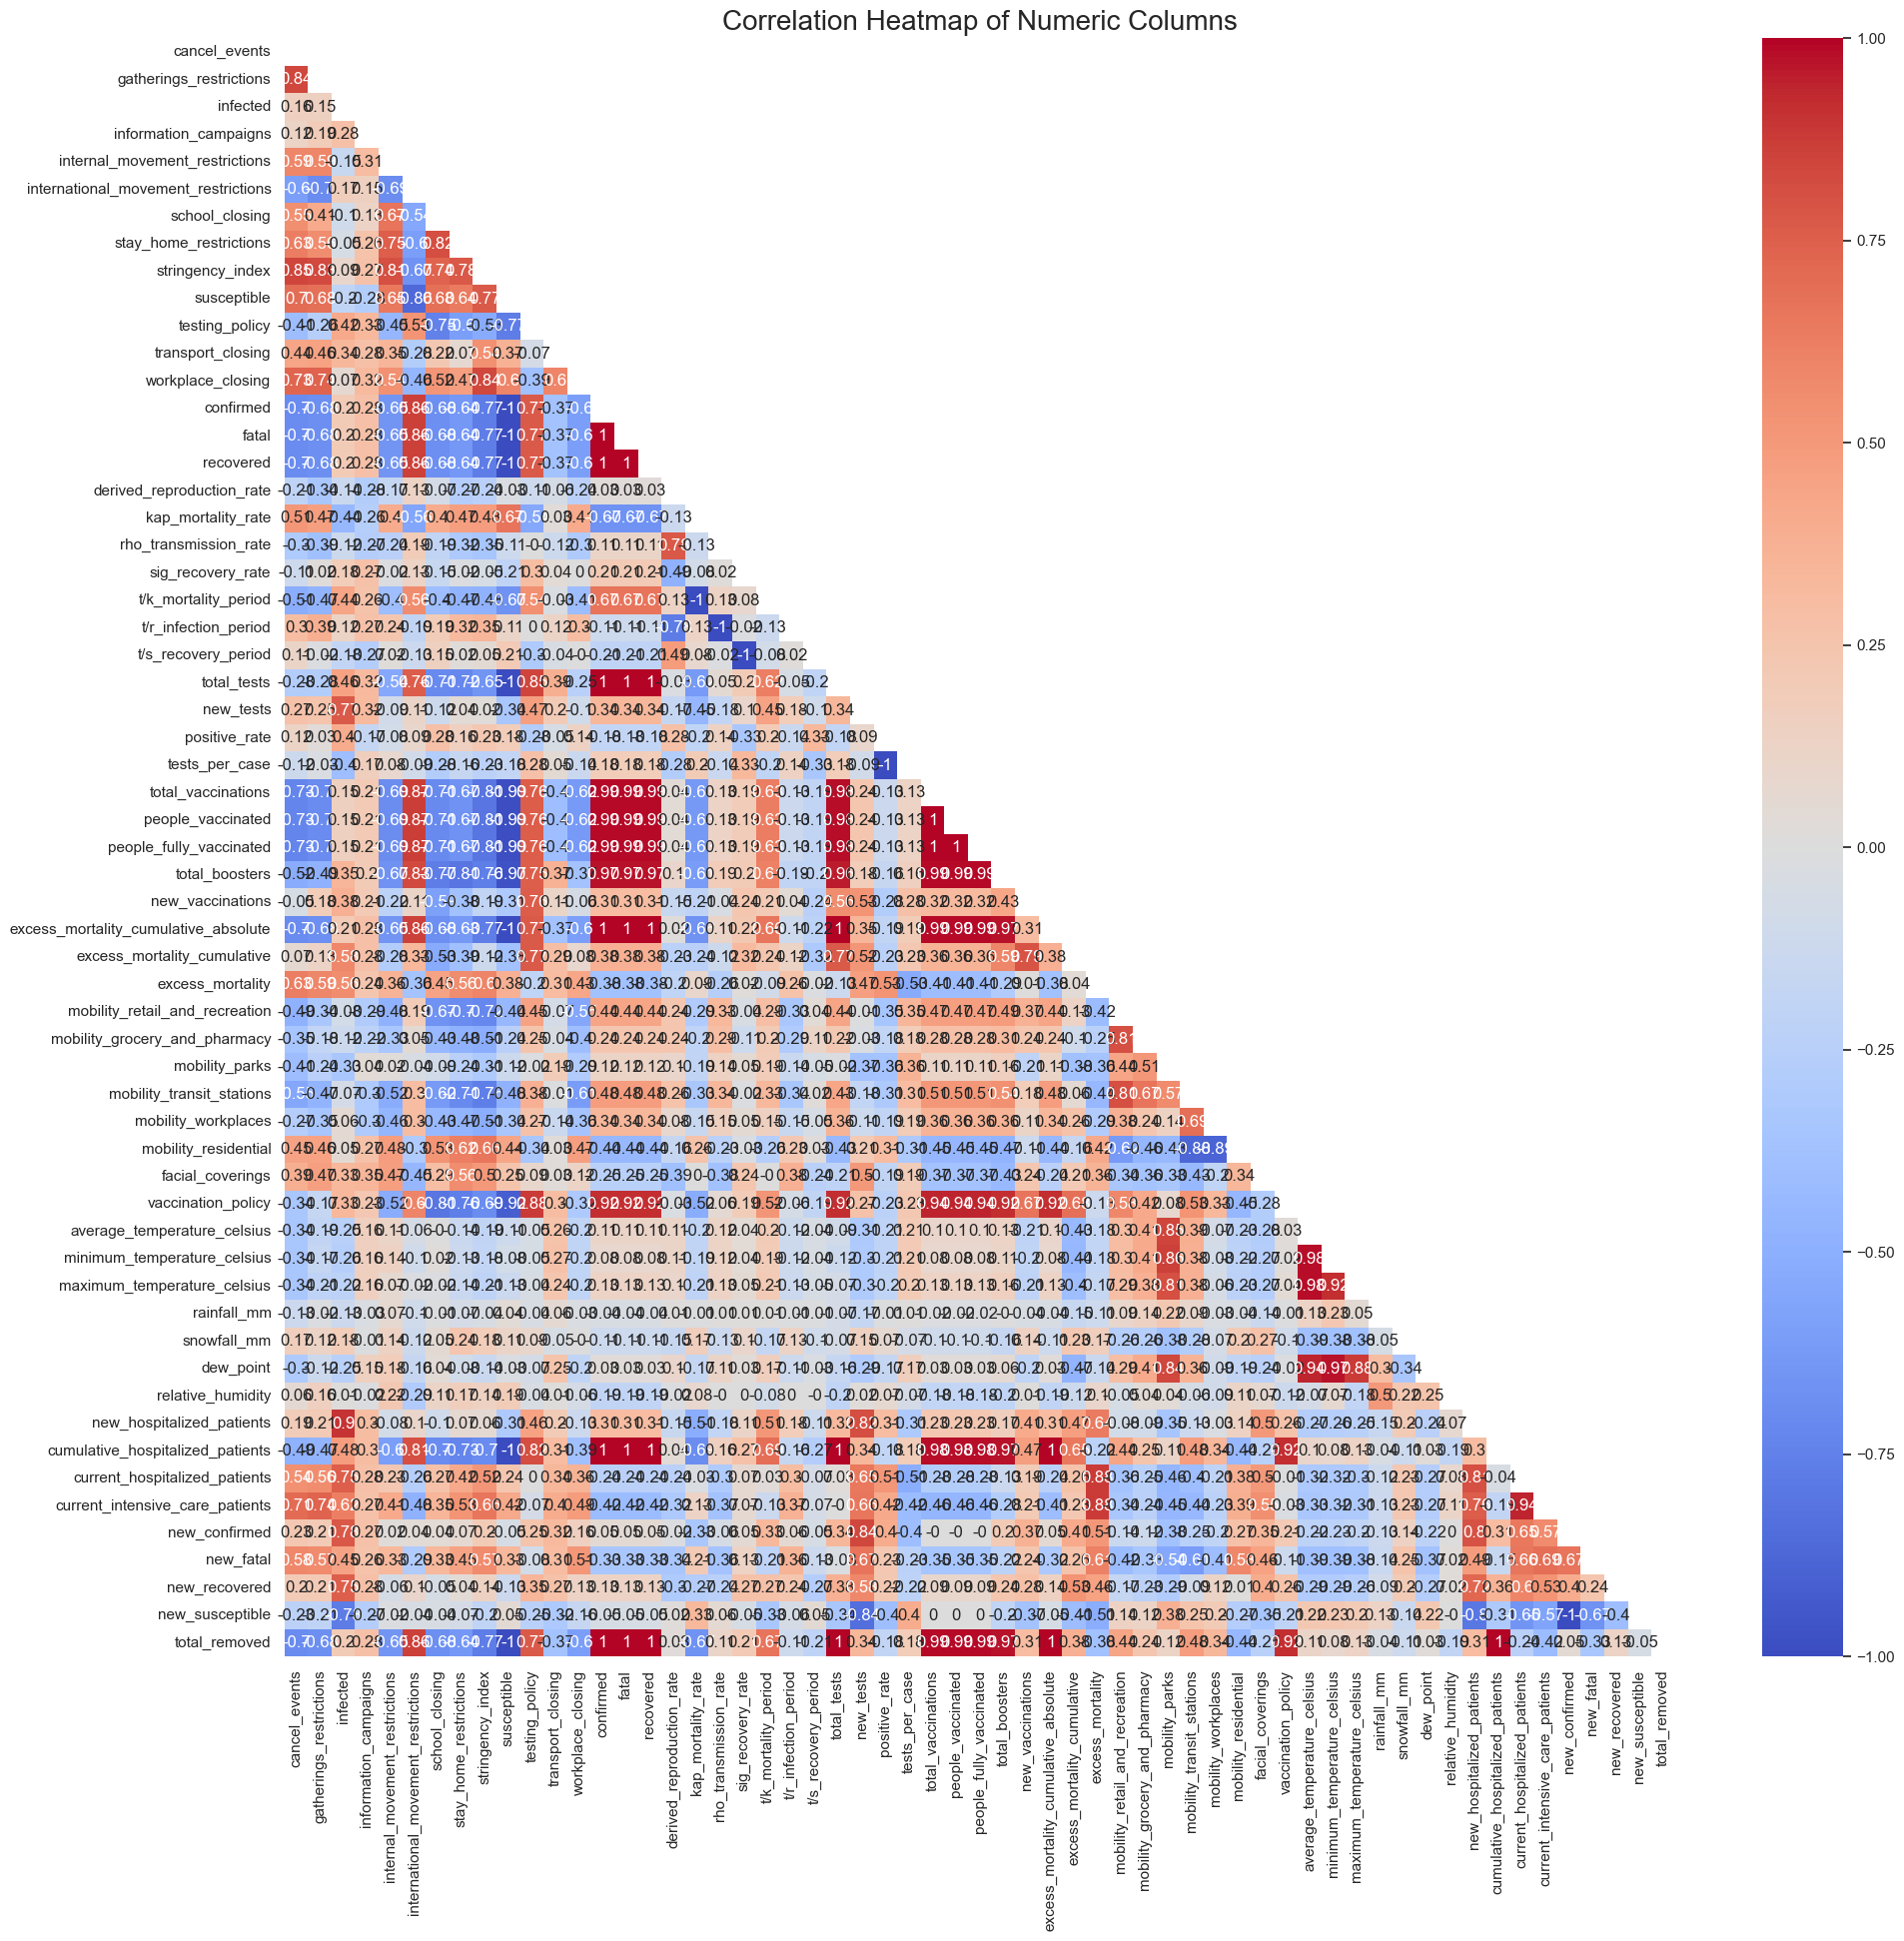

In [ ]:
# Compute the correlation matrix for the Iris DataFrame. This will give us the correlation coefficient between every pair of features (including the target).
# Calculate all the correlations between each independent variables
corr_df = master_df.corr('spearman')

# Mask for upper-triangular
mask = np.triu(corr_df)
plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask, center=0)
plt.title('Correlation Heatmap of Numeric Columns', fontsize=20)
plt.show()

# Display the correlation matrix, transposed for readability and sorted by the 'target' column. This gives us an idea of which features are most strongly correlated with the target.
# The 'style.background_gradient' method is used to apply a color gradient to the 'target' column, making it easier to visually identify high and low correlation values.
# display(correlation.T.sort_values('target').style.background_gradient(subset='target', cmap='coolwarm'))


$$R_0 = \frac{\text{transmission rate}}{\text{recovery rate} + \text{mortality rate}}$$

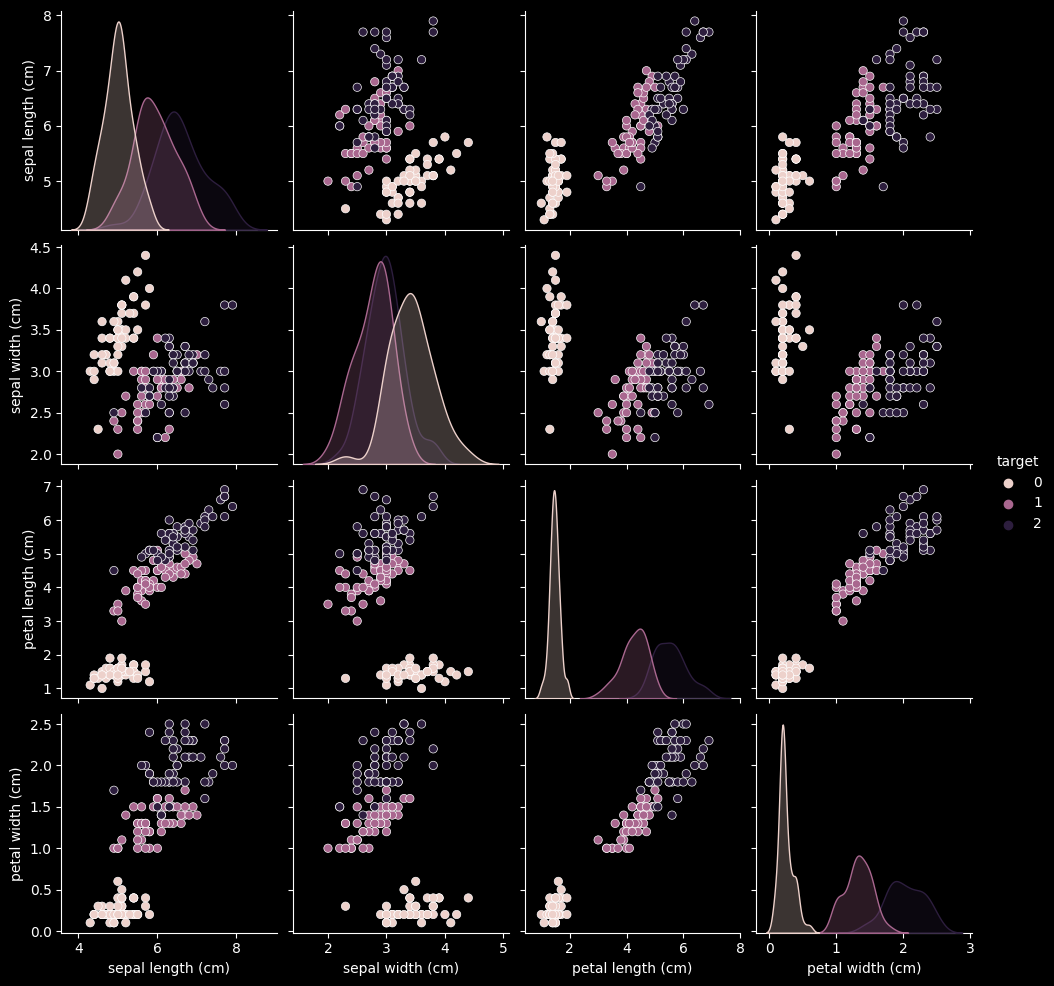

In [ ]:
# Create pairplot of the Iris DataFrame, colored by the 'target' column. This helps visualize the distribution and relationship of each pair of features.
sns.pairplot(df, hue='target')
plt.show()


### <a id='toc1_2_3_'></a>[Advanced EDA: Clustering](#toc0_)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


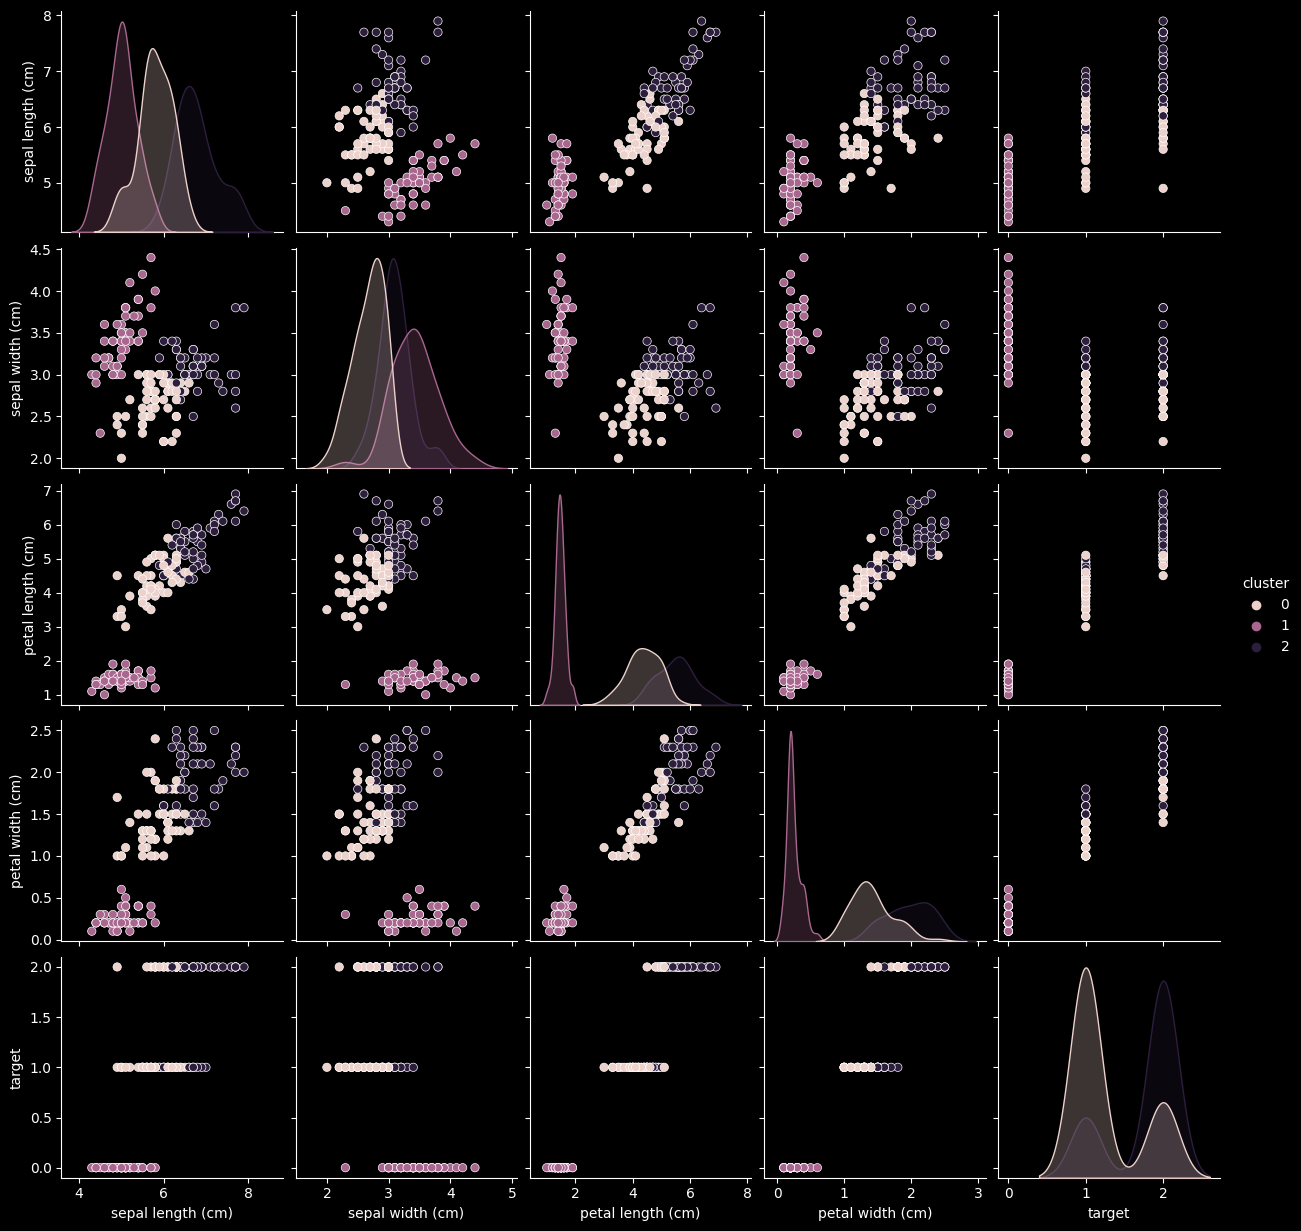

In [ ]:
# Prepare the feature matrix by dropping the 'target' column from the original DataFrame.
X = df.drop('target', axis=1)

# Standardize the features to have a mean of 0 and standard deviation of 1. This is necessary for many machine learning algorithms.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering on the standardized features, specifying 3 clusters (to match the number of Iris species).
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Add the cluster labels generated by K-Means to the original DataFrame.
df['cluster'] = kmeans.labels_

# Create pairplot of the Iris DataFrame, this time colored by the 'cluster' column. This helps visualize how well K-Means was able to separate the different Iris species.
sns.pairplot(df, hue='cluster')
plt.show()


## <a id='toc1_3_'></a>[Insights and Conclusions](#toc0_)

Based on the univariate and bivariate analysis we performed on the Iris dataset, we can make the following observations:

1. **Univariate Analysis**: The variables 'sepal_width', 'sepal_length', 'petal_width', and 'petal_length' all follow a somewhat normal distribution, with some having a slightly skewed distribution. The 'species' variable, which is categorical, has an equal distribution of classes, meaning we have a balanced dataset.

2. **Bivariate Analysis**: The correlation matrix and pairplot give us an idea of the relationship between variables. 'Petal_length' and 'petal_width' show a strong positive correlation, meaning they increase together. Similarly, 'sepal_length' and 'petal_length' as well as 'sepal_length' and 'petal_width' show a strong positive correlation. 'Sepal_length' and 'sepal_width' show a negative correlation, meaning as one increases, the other decreases. These correlations indicate that petal measurements may be a good predictor of species type.

3. **Clustering Analysis**: KMeans clustering was performed on the data and it grouped the data into three clusters. When we compare these clusters with the original 'species' labels, we can see a good overlap, which indicates that the clusters formed are meaningful and reflect the natural groupings in the data. However, there are some misclassifications, particularly between the Versicolor and Virginica species. This could be due to the fact that these two species are more similar to each other in terms of sepal and petal measurements compared to the Setosa species, which is more distinct.

In conclusion, this analysis shows that the Iris dataset has meaningful and significant patterns that can be captured using statistical analysis and machine learning techniques. These patterns are reflective of the underlying biological differences between different species of Iris flowers.